# Отчет по лабораторной работе №5. Визуализация данных

## Выполнение работы
В рамках лабораторной работы было выполнено:
1. Открыли файл в Google Colab (используйте собственный форк репозитория).
2. Решили задачи.
3. Сохранили результат в репозиторий github в директорию `./les05`.
4. Создали *pull request* в репозиторий: [https://github.com/chebotarevsa/dap-2024](https://github.com/chebotarevsa/dap-2024).
- Название pull request имеет формат: <Номер лабораторной работы> <Номер группы> <ФИО>.
5. Сдали работу в системе *Пегас*, в отчете указали ссылку на pull request.

**Ссылка на репозиторий GitHub (лабораторная работа №5): [https://github.com/ALEXANDER-ALLIS/dap-2024/tree/main/les05](https://github.com/ALEXANDER-ALLIS/dap-2024/tree/main/les05).**

In [1]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Matplotlib version: {mpl.__version__}")

%matplotlib inline

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy version: 2.0.2
Matplotlib version: 3.10.0


### Задание №1.

Постройте два линейных графика функции $y=\frac{2}{x}+3$ на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

* графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок;
* первый график должен быть красного цвета и нарисован штрихпунктирной линией;
* второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией.

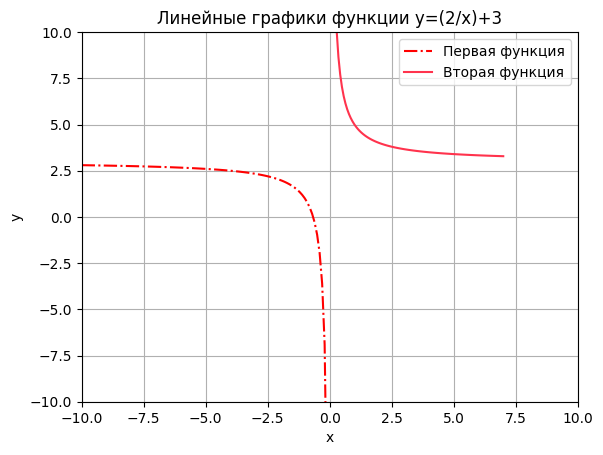

In [7]:
fig = plt.figure() # Определяет окно в котором всё будет делаться
ax = plt.axes() # Axes - сама область координат

x = np.linspace(-10, 0, 100) # Определяется область значений
x1 = np.linspace(0, 7, 100)
x = x[x != 0] # Исключаем 0
x1 = x1[x1 != 0]

ax.plot(x, (2/x) + 3, '-.r', label = "Первая функция") # Строим функции
ax.plot(x1, (2/x1) + 3, color = (1.0,0.2,0.3), label = "Вторая функция")
ax.set_xlim(-10, 10) # Выставляем пределы по x и y
ax.set_ylim(-10, 10)
ax.set_xlabel('x') # Подписываем оси x и y
ax.set_ylabel('y')
ax.legend()

ax.set_title('Линейные графики функции y=(2/x)+3') # Подписываем заголовок
ax.grid()

### Задание №2.

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).

* по оси X - возраcт пассажира (Age);
* по оси Y - стоимость билета (Fare);
* для выживших пассажиров используется маркер зеленый круг (Survived);
* для не выживших пассажиров используется маркер красный крест (Survived);
* график должен иметь подписи к осям и легенду и заголовок.

Данные для которых не указан возврат или стоимость билета должны быть исключены.

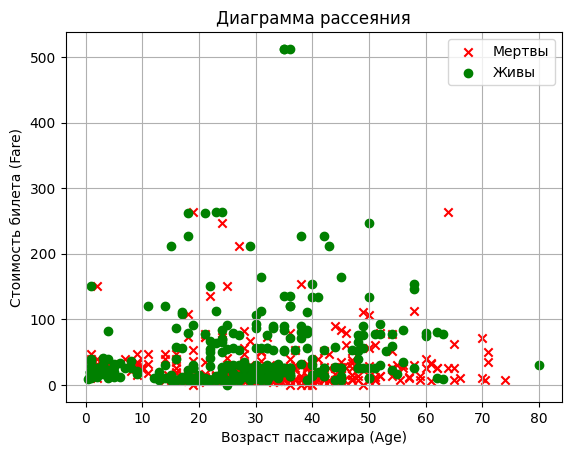

In [8]:
import pandas as pd

passengers = pd.read_csv( 'titanic.csv', index_col = 'PassengerId')

passengers_dead = passengers[passengers['Survived'] == 0]
passengers_alive = passengers[passengers['Survived'] == 1]

plt.scatter(passengers_dead['Age'], passengers_dead['Fare'], color = 'red', marker = 'x', label = "Мертвы")
plt.scatter(passengers_alive['Age'], passengers_alive['Fare'], color = 'green', marker = 'o', label = "Живы")

plt.xlabel('Возраст пассажира (Age)')
plt.ylabel('Стоимость билета (Fare)')
plt.title('Диаграмма рассеяния')
plt.legend()

plt.grid(True)
plt.show()

### Задание №3.

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы.
Для набора данных [iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'):

* холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия);
* цвет маркеров должен зависеть от вида ирисов (iris.target);
* графики должны иметь подписи к осям, легенду и общий заголовок.

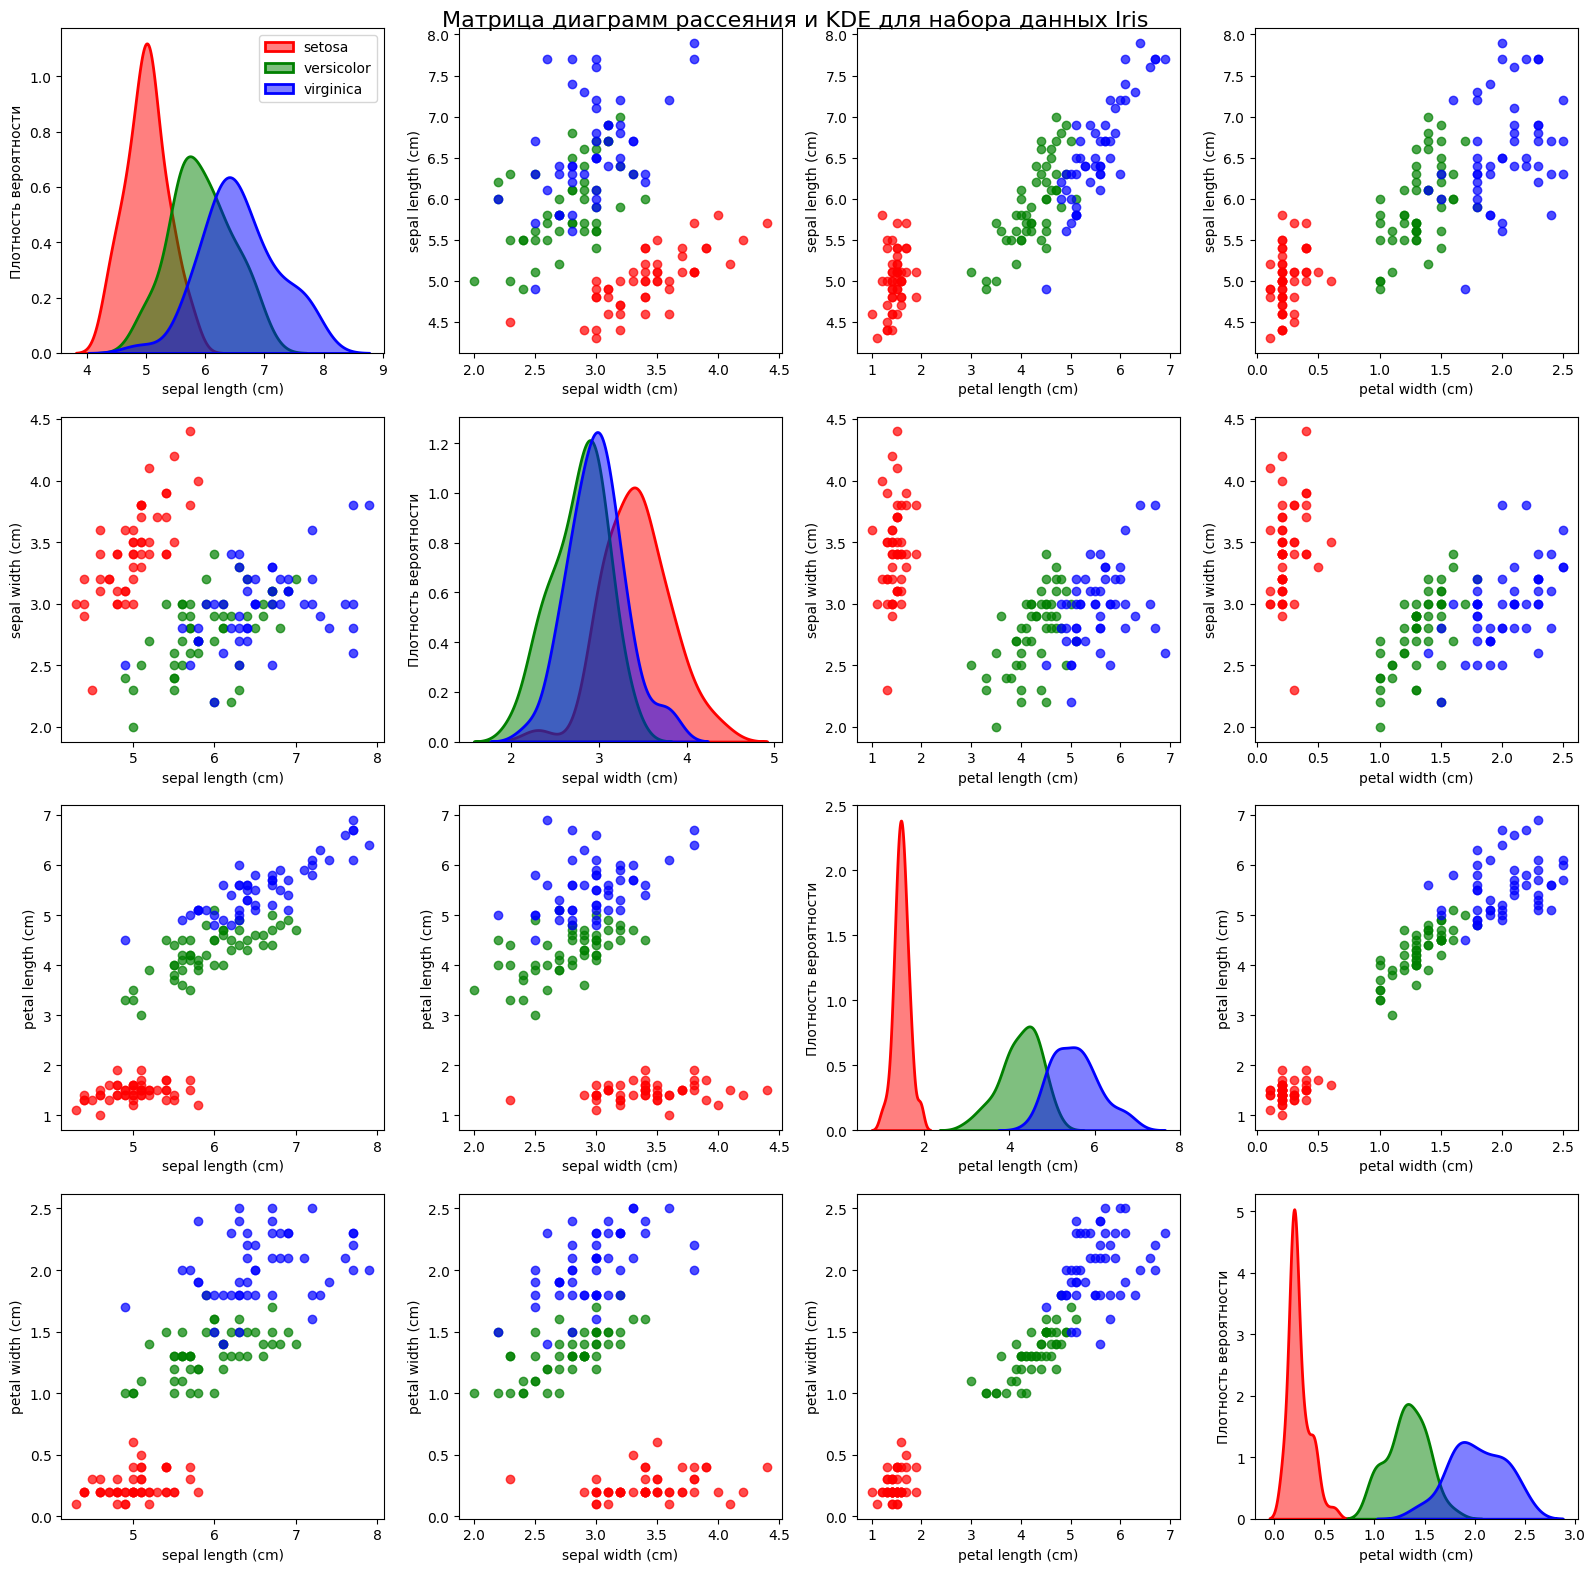

In [18]:
from sklearn.datasets import load_iris
import seaborn as sns
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle("Матрица диаграмм рассеяния и KDE для набора данных Iris", fontsize=16)

colors = ["red", "green", "blue"]

for i in range(4):
    for j in range(4):
        if i == j:

            for target in range(3):
                sns.kdeplot(X[y == target, i], ax=axes[i, j],
                           color=colors[target], label=target_names[target],
                           fill=True, alpha=0.5, linewidth=2)
            axes[i, j].set_xlabel(feature_names[i])
            axes[i, j].set_ylabel("Плотность вероятности")
        else:

            for target in range(3):
                axes[i, j].scatter(X[y == target, j], X[y == target, i],
                                  c=colors[target], alpha=0.7, label=target_names[target])
            axes[i, j].set_xlabel(feature_names[j])
            axes[i, j].set_ylabel(feature_names[i])
        if i == 0 and j == 0:
            axes[i, j].legend()

plt.tight_layout()
plt.show()

### Задание №4.

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):

* постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет;
* постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал;
* график должен иметь подписи к осям, легенду и заголовок.

Данные для которых не указан возраст или стоимость билета должны быть исключены.

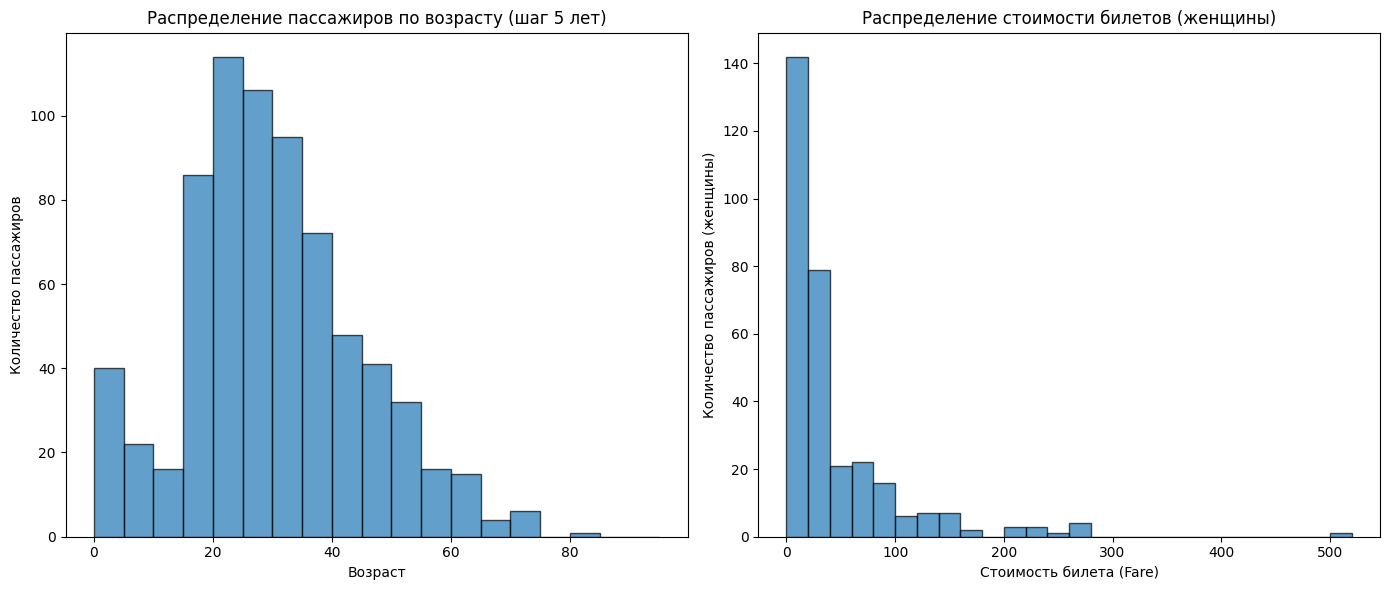

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

passengers = pd.read_csv('titanic.csv', index_col='PassengerId')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма распределения по возрасту (интервал 5 лет)
age_bins = range(0, 100, 5)
axes[0].hist(passengers['Age'].dropna(), bins=age_bins, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество пассажиров')
axes[0].set_title('Распределение пассажиров по возрасту (шаг 5 лет)')

# Гистограмма стоимости билетов для женщин
females = passengers[passengers['Sex'] == 'female']
fare_bins = np.arange(0, females['Fare'].max() + 20, 20)  # шаг 20
axes[1].hist(females['Fare'].dropna(), bins=fare_bins, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Стоимость билета (Fare)')
axes[1].set_ylabel('Количество пассажиров (женщины)')
axes[1].set_title('Распределение стоимости билетов (женщины)')

plt.tight_layout()
plt.show()

### Задание №5.

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:

* диаграмма должна быть вертикальной;
* по оси X - класс каюты пассажира (Pclass);
* по оси Y - средняя стоимость за проезд для данного класса (Fare);
* график должен иметь подписи к осям, легенду и заголовок.

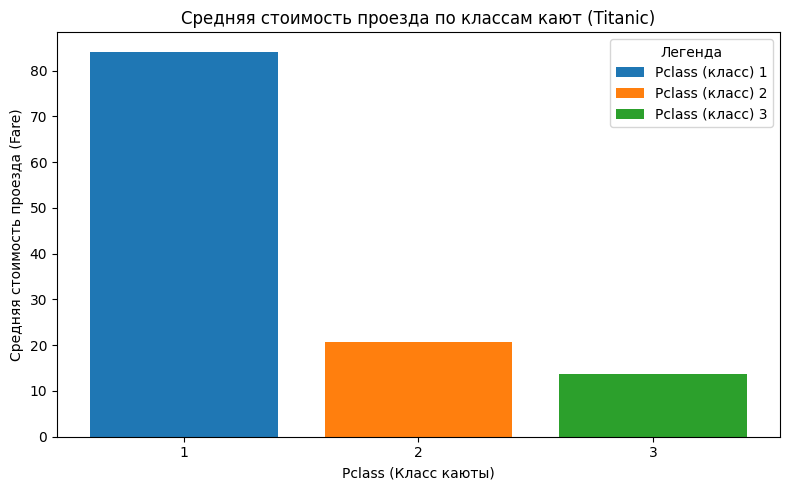

In [40]:
from matplotlib import legend
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Загрузка данных
df = pd.read_csv('titanic.csv')

# Группировка по классу и вычисление средней платы
mean_fare = df.groupby("Pclass", observed=True)["Fare"].mean().sort_index()

# Настройка фигуры
fig, ax = plt.subplots(figsize=(8, 5))

# Вертикальная столбчатая диаграмма
bars = ax.bar(mean_fare.index.astype(str), mean_fare.values, color=["#1f77b4", "#ff7f0e", "#2ca02c"], label = ["Pclass 1", "Pclass 2", "Pclass 3"])

# Подписи осей, заголовок и легенда
ax.set_xlabel("Pclass (Класс каюты)")
ax.set_ylabel("Средняя стоимость проезда (Fare)")
ax.set_title("Средняя стоимость проезда по классам кают (Titanic)")

# Сделаем легенду, объясняющую цвета — создадим пользовательские элементы
# Создаем объекты-патчи для легенды
legend_elements = [
    mpatches.Patch(facecolor="#1f77b4", label="Pclass (класс) 1"),
    mpatches.Patch(facecolor="#ff7f0e", label="Pclass (класс) 2"),
    mpatches.Patch(facecolor="#2ca02c", label="Pclass (класс) 3")
]

# Теперь вызываем legend с созданными элементами
ax.legend(handles=legend_elements, title="Легенда")

plt.tight_layout()
plt.show()

### Задание №6.

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:

* диаграмма должна быть вертикальной;
* по оси X - класс каюты пассажира (Pclass);
* по оси Y - количество пассажиров с разбивкой по полу (Sex);
* график должен иметь подписи к осям, легенду и заголовок.

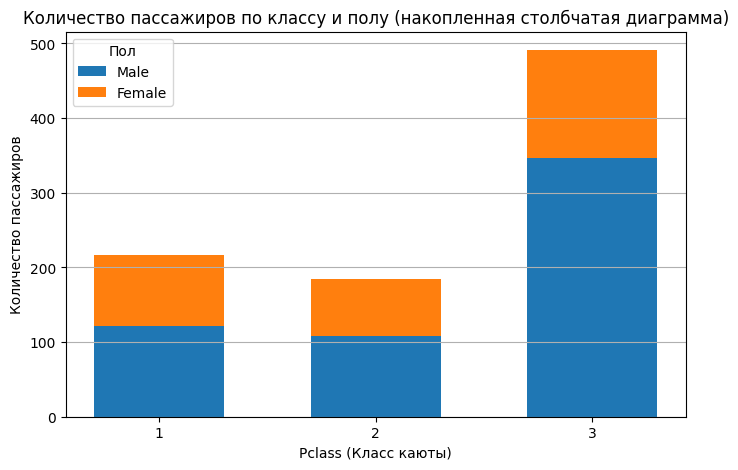

In [54]:
# Подготовка данных: количество пассажиров по Pclass и Sex
pivot = df.pivot_table(index='Pclass', columns='Sex', values='PassengerId', aggfunc='count', fill_value=0)

# Если в данных есть NaN или другие категории пола, оставим только 'male' и 'female' в предсказуемом порядке
sex_order = [s for s in ['male', 'female'] if s in pivot.columns]
pivot = pivot[sex_order]

# Параметры для построения
x = pivot.index.astype(str)          # метки классов как строки
width = 0.6                          # ширина столбца

# Построение вертикального накопленного столбчатого графика
fig, ax = plt.subplots(figsize=(8, 5))
bottom = None
for sex in sex_order:
    counts = pivot[sex].values
    ax.bar(x, counts, width, bottom=bottom, label=sex.capitalize())
    if bottom is None:
        bottom = counts.copy()
    else:
        bottom = bottom + counts

# Подписи, легенда, заголовок
ax.set_xlabel('Pclass (Класс каюты)')
ax.set_ylabel('Количество пассажиров')
ax.set_title('Количество пассажиров по классу и полу (накопленная столбчатая диаграмма)')
ax.legend(title='Пол')

ax.yaxis.grid()
plt.show()

### Задание №7.

Для набора данных iris постройте круговую диаграмму:

* диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе;
* сектор с максимальной долей долен быть выдвинут;
* график должен иметь подписи к осям, легенду и заголовок.

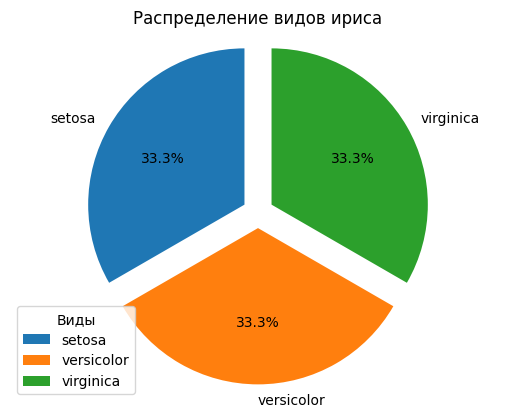

In [72]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
labels = iris.target_names
counts = [sum(iris.target == i) for i in range(len(labels))]
explode = [0.1 if c == max(counts) else 0 for c in counts]

plt.figure()
plt.pie(counts, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Распределение видов ириса')
plt.legend(labels, title='Виды', loc='best')
plt.axis('equal')
plt.show()

### Задание №8.

Использую библиотеку [Seaborn](https://seaborn.pydata.org/) постройте гистограмму для возраста пассажиров «Титаника».

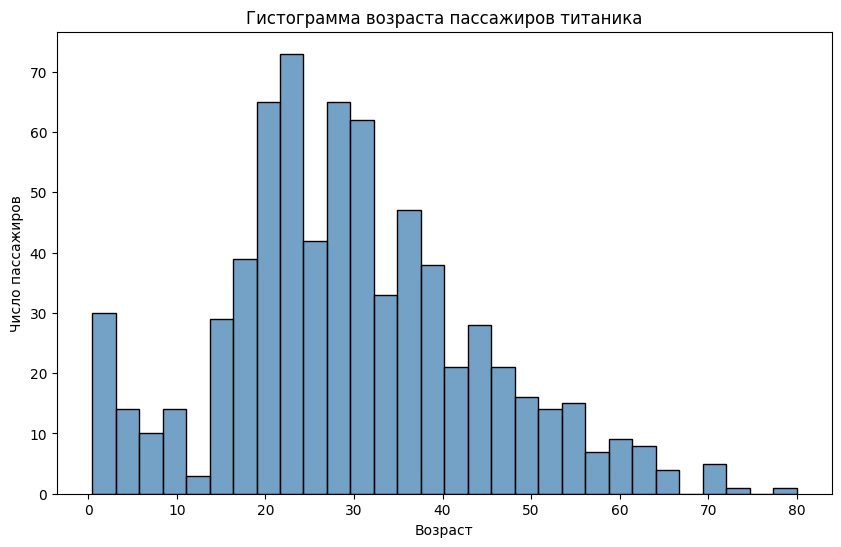

In [77]:
import seaborn as sns

df = pd.read_csv('titanic.csv')
age = df['Age'].dropna()

# Построение гистограммы
plt.figure(figsize=(10,6))
sns.histplot(age, bins=30, kde=False, color='steelblue')
plt.xlabel('Возраст')
plt.ylabel('Число пассажиров')
plt.title('Гистограмма возраста пассажиров титаника')
plt.show()